# Goal a passenger survived the sinking of the Titanic or not.

- Import library
    - pandas
    - numpy
    - visiualization

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data From CSV data File 
Display data from `train.csv` file with pandas library

In [3]:
#Upload File On Colab
from google.colab import files
up = files.upload()

data = pd.read_csv('train.csv', delimiter=',')
data.head()

Saving train.csv to train.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Extract data from `train.csv` file
___

get all passengers survived, sex columns values

## Filter data from csv file with pandas

* ## Filter only males data who's survived with pandas
* ## Filter only Females data who's survived with pandas
* ## Males & Females Data plot with `matplotlib.pyplot as plt`


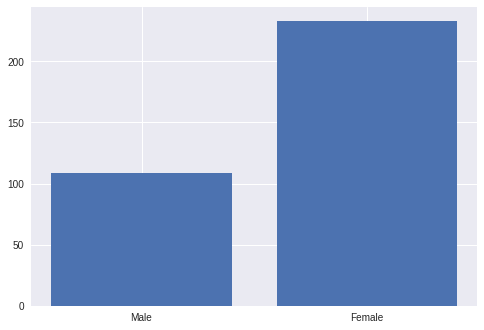

In [4]:
totalSurvied, allGender = data.Survived.values, data.Sex.values
totalMale=len(data[(data['Sex']=='male') & (data['Survived']==1)]['Sex'].values)
totalFemale=len(data[(data['Sex']=='female') & (data['Survived']==1)]['Sex'].values)

y=[totalMale, totalFemale]
x=[1,2]

labels = ['Male','Female']
plt.bar(x,y)
plt.xticks(x,labels)
plt.show()

## Pie Chart Display Data
* Total Males & Females
* Survied or Unsurvived passengers Data
    * Survived males
    * Unsurvived males
    * Survived Females
    * Unsurvived Females
* Rate or percentage Survived Males out of Total Males passengers
* Rate or percentage Survived FeMales out of Total FeMales passengers

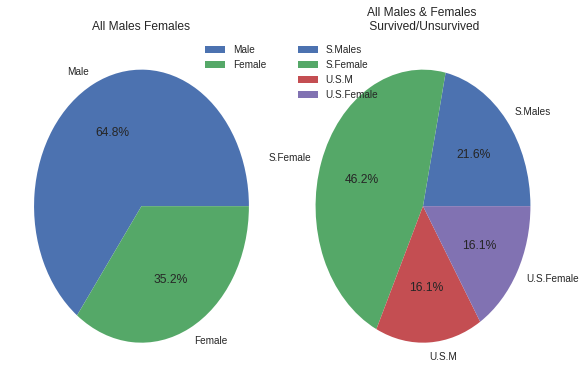

No handles with labels found to put in legend.


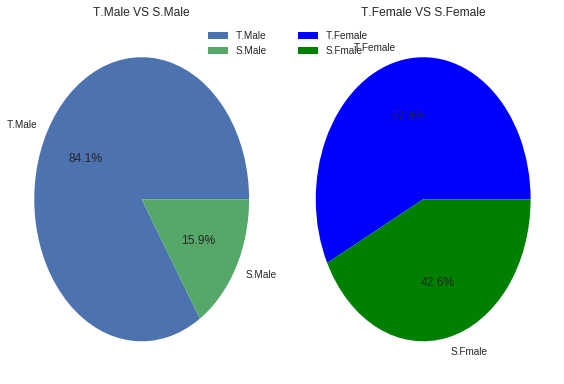

In [5]:
# Total Male & Female 
totalMale=len(data[(data['Sex']=='male')]['Sex'].values)
totalFemale=len(data[(data['Sex']=='female')]['Sex'].values)

## Total Male & Female Survived
totalMaleS=len(data[(data['Sex']=='male') & (data['Survived']==1)]['Sex'].values)
totalFemaleS=len(data[(data['Sex']=='female') & (data['Survived']==1)]['Sex'].values)



TMF=[totalMale, totalFemale] #Total Male & Female
SMF=[totalMaleS, totalFemaleS, totalFemale-totalFemaleS, totalFemale-totalFemaleS] # Total Survived Male & Female

#percentage 
MP = totalMaleS / totalMale * 100 #Male percentage
FP = totalFemaleS / totalFemale * 100 # Female percentage

labels = ['Male','Female']
labels1= ['S.Males','S.Female','U.S.M','U.S.Female']


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


ax1.set_title("All Males Females")
ax1.pie(TMF, labels=labels, autopct='%1.1f%%')
ax1.legend(loc='upper right')

ax2.set_title("All Males & Females \n Survived/Unsurvived")

ax2.pie(SMF, labels=labels1,
        autopct='%1.1f%%')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)


plt.legend(loc='upper left')
ax1.set_title("T.Male VS S.Male")
ax1.pie([totalMale,totalMaleS], labels=['T.Male','S.Male'],
        autopct='%1.1f%%')
ax1.legend()

ax2.set_title("T.Female VS S.Female")
ax2.pie([totalFemale,totalFemaleS], labels=['T.Female','S.Fmale'],
        autopct='%1.1f%%', colors=['blue','green'])
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

## Display All Passengers Age Groupswise with histrogram chart
- All age groups distributed in ten, ten years
- All passengers Data with age groups wise (Blue color)
- All Survived passengers Data plot with (Green Color)
- All Unsurvived passengers data plot with (Red Color)

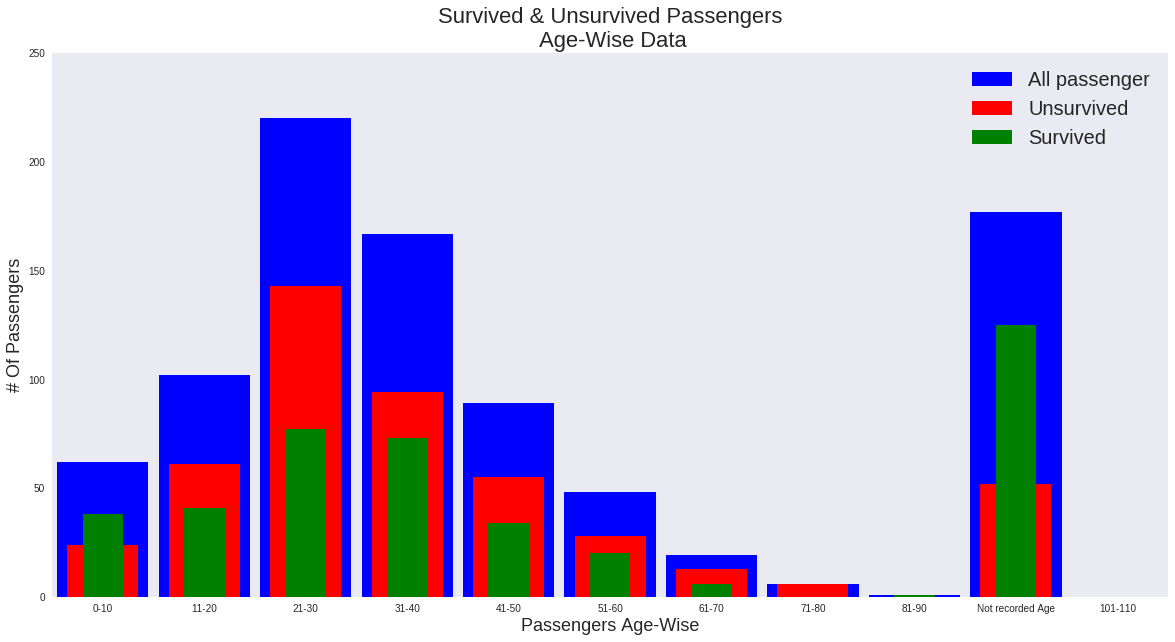

In [8]:
from collections import Counter

adata = data['Age'].values #All passengers data
sdata = data['Age'][(data.Survived==1)].values #All passengers Survived data
udata = data['Age'][(data.Survived==0)].values #All passengers unSurvived data
aNanAgedata = data['Age'].isnull().sum() # All not recorded age passengers
sNanAgedata = data['Age'][(data.Survived==1)].isnull().sum() # All not recorded age passengers survived
uNanAgedata = data['Age'][(data.Survived==0)].isnull().sum() # All not recorded age passengers unsurvived
 
#define function for groping passenger age wise
decile = lambda grade: grade // 10 * 10

allAgesPassengers = Counter(decile(age) for age in adata)
agesPassengersSurvived = Counter(decile(age) for age in sdata)
agesPassengersUnSurvived = Counter(decile(age) for age in udata)

plt.figure(figsize=(20,10))
#allAgesPassengers Data plot
plt.bar([x for x in allAgesPassengers.keys()], # shift each bar to the left by 4
        allAgesPassengers.values(), # give each bar its correct height
        9, color='b', label='All passenger') # give each bar a width of 8

#UnSurvived passenger data plot
plt.bar([x for x in agesPassengersUnSurvived.keys()], # shift each bar to the left by 4
        agesPassengersUnSurvived.values(), # give each bar its correct height
        7, color='r', label='Unsurvived') # give each bar a width of 8


#Survived passenger data plot
plt.bar([x for x in agesPassengersSurvived.keys()], # shift each bar to the left by 4
        agesPassengersSurvived.values(), # give each bar its correct height
        4, color='g', label='Survived') # give each bar a width of 8

#Those passengers we have not recorded age
plt.bar(90,aNanAgedata, 9, color='b')
plt.bar(90,sNanAgedata, 7, color='r')
plt.bar(90,uNanAgedata, 4,  color='g')

plt.axis([-5, 105, 0, 250]) # x-axis from -5 to 105,
 # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)],['0-10','11-20','21-30','31-40','41-50','51-60','61-70',
                                       '71-80','81-90','Not recorded Age','101-110']) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Passengers Age-Wise", fontsize=18)
plt.ylabel("# Of Passengers", fontsize=18)
plt.title("Survived & Unsurvived Passengers\n Age-Wise Data", fontsize=22)
plt.grid()
plt.legend(fontsize=20)
plt.show()
